In [34]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [35]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
df_test = pd.read_csv('data/test.csv', header=None, sep='\,')

C:\Users\wens_120\anaconda3\envs\tf20\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
def split_y(data, col) :
    X = data.iloc[:, :-4]
    y = data.iloc[:, -4:]
    
    y = y[col]
    
    data = pd.concat([X,y], axis=1)
    
    return data

In [37]:
train

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,12.68,4.11,12.31,0.10
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,1.814274e-16,1.117148e-16,7.352416e-17,NaN,5.825347e-16,4.226436e-15,8.46,4.11,10.46,3.12
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,4.828451e-11,3.110419e-11,8.119095e-12,NaN,1.504115e-10,4.003657e-10,9.84,3.20,10.45,2.06
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.279271e-13,0.000000e+00,4.475946e-14,NaN,2.818857e-12,1.408742e-11,6.38,4.06,11.28,4.03


In [38]:
train_hhb = split_y(train, 'hhb')
train_hbo2 = split_y(train, 'hbo2')
train_na = split_y(train, 'na')
train_ca = split_y(train, 'ca')

In [39]:
train_hbo2

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hbo2
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,3.527371e-18,NaN,6.455564e-19,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,4.32
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,NaN,5.233480e-09,1.264238e-08,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,2.83
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,1.409413e-18,3.237480e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,3.00
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,6.118947e-11,NaN,1.663888e-10,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,4.01
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,NaN,1.537619e-14,4.996522e-14,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,4.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,2.314357e-15,2.694142e-15,NaN,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,4.11
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,NaN,1.644859e-17,6.861706e-17,1.814274e-16,1.117148e-16,7.352416e-17,NaN,5.825347e-16,4.226436e-15,4.11
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,NaN,NaN,6.473638e-11,4.828451e-11,3.110419e-11,8.119095e-12,NaN,1.504115e-10,4.003657e-10,3.20
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.149953e-13,4.371711e-14,NaN,3.279271e-13,0.000000e+00,4.475946e-14,NaN,2.818857e-12,1.408742e-11,4.06


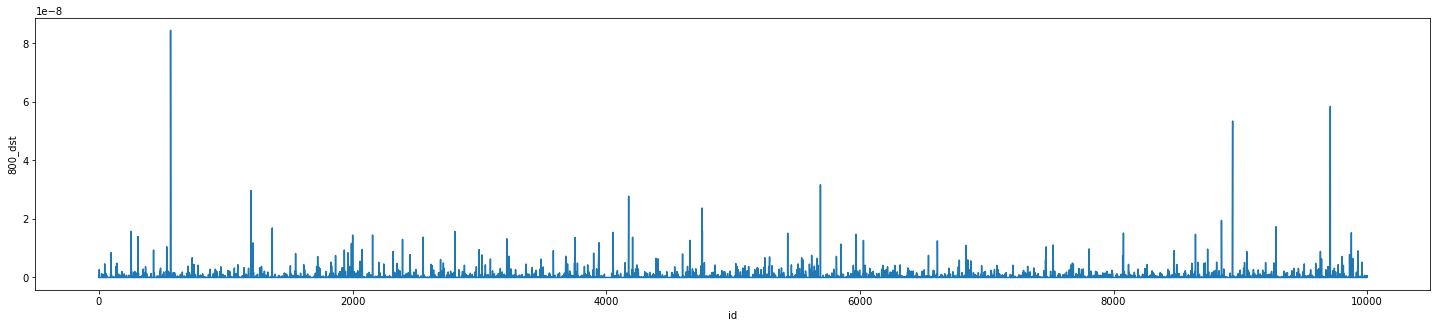

In [40]:
fig, ax = plt.subplots(figsize = (25, 5))

sns.lineplot(x = train['id'], y = train['800_dst'], ax = ax)
plt.show()

In [41]:
train_hhb.drop(['id'], axis=1, inplace=True)

In [42]:
train_hbo2.drop(['id'], axis=1, inplace=True)
X = train_hbo2.iloc[:, :-1]
y = train_hbo2.iloc[:, -1:]
# X = test_hbo2.iloc[:, :-1]
# y = test_hbo2.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
X_train

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
7389,10,0.00345,0.00000,0.01804,0.01623,0.00000,0.00000,0.00134,0.01608,0.00922,...,2.500819e-09,NaN,2.579578e-09,6.423301e-09,NaN,1.983869e-09,7.053821e-10,1.581031e-09,6.843149e-09,1.442369e-08
9275,15,0.01103,0.00248,0.00000,0.00000,0.00632,0.00000,0.00000,0.00357,0.00000,...,3.169678e-12,3.287494e-12,2.258963e-12,1.664952e-12,3.084950e-13,0.000000e+00,0.000000e+00,4.695013e-15,NaN,0.000000e+00
2995,20,0.29737,0.33561,0.39811,0.45503,0.53130,0.57409,0.64684,0.72156,0.80013,...,3.742792e-16,1.281187e-15,NaN,7.340594e-16,8.120261e-16,6.466827e-16,0.000000e+00,1.213880e-15,6.852576e-15,3.707218e-14
5316,20,0.11715,0.15043,0.12979,0.16339,0.17131,0.18314,0.19243,0.22711,0.24389,...,6.851661e-16,3.906107e-16,4.707062e-16,6.015360e-16,1.657104e-16,4.619993e-16,NaN,0.000000e+00,1.184859e-15,1.030511e-14
356,10,0.77052,0.81632,0.90013,0.93734,0.99090,0.98748,1.01119,0.98756,0.97871,...,NaN,1.693492e-11,2.796727e-11,NaN,1.599787e-11,0.000000e+00,7.759758e-13,2.361468e-11,NaN,4.561444e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,20,0.00000,0.00000,0.00000,0.01874,0.00000,0.01758,0.00419,0.01706,0.00640,...,0.000000e+00,NaN,0.000000e+00,5.370032e-16,NaN,1.091174e-16,2.570108e-16,0.000000e+00,2.069530e-15,1.026088e-14
4859,10,0.00000,0.01430,0.00000,0.00580,0.01749,0.00000,0.01663,0.00621,0.02186,...,2.627962e-09,2.045972e-09,2.533040e-09,2.923832e-09,2.811348e-09,1.017693e-09,4.258487e-10,NaN,1.943765e-09,2.910433e-09
3264,20,0.57046,0.64682,0.71284,0.81253,0.86098,0.92021,0.96525,0.99078,1.00557,...,NaN,0.000000e+00,0.000000e+00,NaN,2.195002e-16,0.000000e+00,2.321654e-17,NaN,2.101566e-16,2.836456e-16
9845,25,0.68219,0.79057,0.86150,0.94857,0.98891,0.99295,0.97853,0.93745,0.86845,...,NaN,2.857148e-19,1.112741e-19,0.000000e+00,3.089536e-19,0.000000e+00,2.664085e-19,0.000000e+00,0.000000e+00,1.867723e-18


In [44]:
X_train = X_train.fillna(0)
# y_train = y_train.fillna(0)
X_test = X_test.fillna(0)
# y_test = y_test.fillna(0)

In [45]:
X_train

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
7389,10,0.00345,0.00000,0.01804,0.01623,0.00000,0.00000,0.00134,0.01608,0.00922,...,2.500819e-09,0.000000e+00,2.579578e-09,6.423301e-09,0.000000e+00,1.983869e-09,7.053821e-10,1.581031e-09,6.843149e-09,1.442369e-08
9275,15,0.01103,0.00248,0.00000,0.00000,0.00632,0.00000,0.00000,0.00357,0.00000,...,3.169678e-12,3.287494e-12,2.258963e-12,1.664952e-12,3.084950e-13,0.000000e+00,0.000000e+00,4.695013e-15,0.000000e+00,0.000000e+00
2995,20,0.29737,0.33561,0.39811,0.45503,0.53130,0.57409,0.64684,0.72156,0.80013,...,3.742792e-16,1.281187e-15,0.000000e+00,7.340594e-16,8.120261e-16,6.466827e-16,0.000000e+00,1.213880e-15,6.852576e-15,3.707218e-14
5316,20,0.11715,0.15043,0.12979,0.16339,0.17131,0.18314,0.19243,0.22711,0.24389,...,6.851661e-16,3.906107e-16,4.707062e-16,6.015360e-16,1.657104e-16,4.619993e-16,0.000000e+00,0.000000e+00,1.184859e-15,1.030511e-14
356,10,0.77052,0.81632,0.90013,0.93734,0.99090,0.98748,1.01119,0.98756,0.97871,...,0.000000e+00,1.693492e-11,2.796727e-11,0.000000e+00,1.599787e-11,0.000000e+00,7.759758e-13,2.361468e-11,0.000000e+00,4.561444e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,20,0.00000,0.00000,0.00000,0.01874,0.00000,0.01758,0.00419,0.01706,0.00640,...,0.000000e+00,0.000000e+00,0.000000e+00,5.370032e-16,0.000000e+00,1.091174e-16,2.570108e-16,0.000000e+00,2.069530e-15,1.026088e-14
4859,10,0.00000,0.01430,0.00000,0.00580,0.01749,0.00000,0.01663,0.00621,0.02186,...,2.627962e-09,2.045972e-09,2.533040e-09,2.923832e-09,2.811348e-09,1.017693e-09,4.258487e-10,0.000000e+00,1.943765e-09,2.910433e-09
3264,20,0.57046,0.64682,0.71284,0.81253,0.86098,0.92021,0.96525,0.99078,1.00557,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.195002e-16,0.000000e+00,2.321654e-17,0.000000e+00,2.101566e-16,2.836456e-16
9845,25,0.68219,0.79057,0.86150,0.94857,0.98891,0.99295,0.97853,0.93745,0.86845,...,0.000000e+00,2.857148e-19,1.112741e-19,0.000000e+00,3.089536e-19,0.000000e+00,2.664085e-19,0.000000e+00,0.000000e+00,1.867723e-18


In [46]:
y_remake_test = df_test[0]
y_remake_test.dtype

dtype('O')

In [47]:
y_remake_test[1:]

1        10000
2        10001
3        10002
4        10003
5        10004
         ...  
9996     19995
9997     19996
9998     19997
9999     19998
10000    19999
Name: 0, Length: 10000, dtype: object

In [48]:
y_type64 = y_remake_test[1:].astype('float64')

In [49]:
X_train

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
7389,10,0.00345,0.00000,0.01804,0.01623,0.00000,0.00000,0.00134,0.01608,0.00922,...,2.500819e-09,0.000000e+00,2.579578e-09,6.423301e-09,0.000000e+00,1.983869e-09,7.053821e-10,1.581031e-09,6.843149e-09,1.442369e-08
9275,15,0.01103,0.00248,0.00000,0.00000,0.00632,0.00000,0.00000,0.00357,0.00000,...,3.169678e-12,3.287494e-12,2.258963e-12,1.664952e-12,3.084950e-13,0.000000e+00,0.000000e+00,4.695013e-15,0.000000e+00,0.000000e+00
2995,20,0.29737,0.33561,0.39811,0.45503,0.53130,0.57409,0.64684,0.72156,0.80013,...,3.742792e-16,1.281187e-15,0.000000e+00,7.340594e-16,8.120261e-16,6.466827e-16,0.000000e+00,1.213880e-15,6.852576e-15,3.707218e-14
5316,20,0.11715,0.15043,0.12979,0.16339,0.17131,0.18314,0.19243,0.22711,0.24389,...,6.851661e-16,3.906107e-16,4.707062e-16,6.015360e-16,1.657104e-16,4.619993e-16,0.000000e+00,0.000000e+00,1.184859e-15,1.030511e-14
356,10,0.77052,0.81632,0.90013,0.93734,0.99090,0.98748,1.01119,0.98756,0.97871,...,0.000000e+00,1.693492e-11,2.796727e-11,0.000000e+00,1.599787e-11,0.000000e+00,7.759758e-13,2.361468e-11,0.000000e+00,4.561444e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,20,0.00000,0.00000,0.00000,0.01874,0.00000,0.01758,0.00419,0.01706,0.00640,...,0.000000e+00,0.000000e+00,0.000000e+00,5.370032e-16,0.000000e+00,1.091174e-16,2.570108e-16,0.000000e+00,2.069530e-15,1.026088e-14
4859,10,0.00000,0.01430,0.00000,0.00580,0.01749,0.00000,0.01663,0.00621,0.02186,...,2.627962e-09,2.045972e-09,2.533040e-09,2.923832e-09,2.811348e-09,1.017693e-09,4.258487e-10,0.000000e+00,1.943765e-09,2.910433e-09
3264,20,0.57046,0.64682,0.71284,0.81253,0.86098,0.92021,0.96525,0.99078,1.00557,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.195002e-16,0.000000e+00,2.321654e-17,0.000000e+00,2.101566e-16,2.836456e-16
9845,25,0.68219,0.79057,0.86150,0.94857,0.98891,0.99295,0.97853,0.93745,0.86845,...,0.000000e+00,2.857148e-19,1.112741e-19,0.000000e+00,3.089536e-19,0.000000e+00,2.664085e-19,0.000000e+00,0.000000e+00,1.867723e-18


In [50]:
gbm = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=50)
# gbm = lgb.LGBMRegressor(num_leaves=31,
#                         learning_rate=0.05,
#                         n_estimators=20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

[1]	valid_0's l1: 0.804123	valid_0's l2: 0.998099
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.799689	valid_0's l2: 0.986574
[3]	valid_0's l1: 0.795506	valid_0's l2: 0.976406
[4]	valid_0's l1: 0.79123	valid_0's l2: 0.965523
[5]	valid_0's l1: 0.786417	valid_0's l2: 0.95351
[6]	valid_0's l1: 0.78341	valid_0's l2: 0.946713
[7]	valid_0's l1: 0.780532	valid_0's l2: 0.938828
[8]	valid_0's l1: 0.777187	valid_0's l2: 0.930617
[9]	valid_0's l1: 0.774487	valid_0's l2: 0.924141
[10]	valid_0's l1: 0.771547	valid_0's l2: 0.916533
[11]	valid_0's l1: 0.768442	valid_0's l2: 0.908303
[12]	valid_0's l1: 0.766757	valid_0's l2: 0.904566
[13]	valid_0's l1: 0.764379	valid_0's l2: 0.899403
[14]	valid_0's l1: 0.761203	valid_0's l2: 0.892267
[15]	valid_0's l1: 0.759942	valid_0's l2: 0.889502
[16]	valid_0's l1: 0.75865	valid_0's l2: 0.88616
[17]	valid_0's l1: 0.755298	valid_0's l2: 0.878702
[18]	valid_0's l1: 0.754081	valid_0's l2: 0.875705
[19]	valid_0's l1: 0.752935	valid_0'

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=50, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [51]:
print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

# feature importances
print('Feature importances:', list(gbm.feature_importances_))

Starting predicting...
The rmse of prediction is: 0.9012352929649313
Feature importances: [133, 6, 6, 8, 6, 2, 3, 5, 3, 8, 6, 5, 2, 12, 7, 6, 6, 3, 0, 8, 11, 9, 10, 13, 9, 8, 10, 4, 12, 15, 8, 16, 16, 5, 22, 59, 4, 42, 26, 34, 52, 44, 32, 28, 28, 28, 33, 48, 42, 37, 33, 28, 31, 19, 9, 17, 42, 22, 16, 20, 9, 31, 11, 21, 8, 6, 8, 7, 7, 42, 173]


In [52]:
X_train

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
7389,10,0.00345,0.00000,0.01804,0.01623,0.00000,0.00000,0.00134,0.01608,0.00922,...,2.500819e-09,0.000000e+00,2.579578e-09,6.423301e-09,0.000000e+00,1.983869e-09,7.053821e-10,1.581031e-09,6.843149e-09,1.442369e-08
9275,15,0.01103,0.00248,0.00000,0.00000,0.00632,0.00000,0.00000,0.00357,0.00000,...,3.169678e-12,3.287494e-12,2.258963e-12,1.664952e-12,3.084950e-13,0.000000e+00,0.000000e+00,4.695013e-15,0.000000e+00,0.000000e+00
2995,20,0.29737,0.33561,0.39811,0.45503,0.53130,0.57409,0.64684,0.72156,0.80013,...,3.742792e-16,1.281187e-15,0.000000e+00,7.340594e-16,8.120261e-16,6.466827e-16,0.000000e+00,1.213880e-15,6.852576e-15,3.707218e-14
5316,20,0.11715,0.15043,0.12979,0.16339,0.17131,0.18314,0.19243,0.22711,0.24389,...,6.851661e-16,3.906107e-16,4.707062e-16,6.015360e-16,1.657104e-16,4.619993e-16,0.000000e+00,0.000000e+00,1.184859e-15,1.030511e-14
356,10,0.77052,0.81632,0.90013,0.93734,0.99090,0.98748,1.01119,0.98756,0.97871,...,0.000000e+00,1.693492e-11,2.796727e-11,0.000000e+00,1.599787e-11,0.000000e+00,7.759758e-13,2.361468e-11,0.000000e+00,4.561444e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,20,0.00000,0.00000,0.00000,0.01874,0.00000,0.01758,0.00419,0.01706,0.00640,...,0.000000e+00,0.000000e+00,0.000000e+00,5.370032e-16,0.000000e+00,1.091174e-16,2.570108e-16,0.000000e+00,2.069530e-15,1.026088e-14
4859,10,0.00000,0.01430,0.00000,0.00580,0.01749,0.00000,0.01663,0.00621,0.02186,...,2.627962e-09,2.045972e-09,2.533040e-09,2.923832e-09,2.811348e-09,1.017693e-09,4.258487e-10,0.000000e+00,1.943765e-09,2.910433e-09
3264,20,0.57046,0.64682,0.71284,0.81253,0.86098,0.92021,0.96525,0.99078,1.00557,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.195002e-16,0.000000e+00,2.321654e-17,0.000000e+00,2.101566e-16,2.836456e-16
9845,25,0.68219,0.79057,0.86150,0.94857,0.98891,0.99295,0.97853,0.93745,0.86845,...,0.000000e+00,2.857148e-19,1.112741e-19,0.000000e+00,3.089536e-19,0.000000e+00,2.664085e-19,0.000000e+00,0.000000e+00,1.867723e-18


In [53]:
def rmsle(y_true, y_pred):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False

In [54]:
print('Starting training with custom eval function...')
# train
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=rmsle,
        early_stopping_rounds=5)

Starting training with custom eval function...
[1]	valid_0's l2: 0.998099	valid_0's RMSLE: 0.210637
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.986574	valid_0's RMSLE: 0.20948
[3]	valid_0's l2: 0.976406	valid_0's RMSLE: 0.208461
[4]	valid_0's l2: 0.965523	valid_0's RMSLE: 0.207372
[5]	valid_0's l2: 0.95351	valid_0's RMSLE: 0.206136
[6]	valid_0's l2: 0.946713	valid_0's RMSLE: 0.205443
[7]	valid_0's l2: 0.938828	valid_0's RMSLE: 0.204603
[8]	valid_0's l2: 0.930617	valid_0's RMSLE: 0.203745
[9]	valid_0's l2: 0.924141	valid_0's RMSLE: 0.203049
[10]	valid_0's l2: 0.916533	valid_0's RMSLE: 0.202257
[11]	valid_0's l2: 0.908303	valid_0's RMSLE: 0.201388
[12]	valid_0's l2: 0.904566	valid_0's RMSLE: 0.200995
[13]	valid_0's l2: 0.899403	valid_0's RMSLE: 0.200449
[14]	valid_0's l2: 0.892267	valid_0's RMSLE: 0.199704
[15]	valid_0's l2: 0.889502	valid_0's RMSLE: 0.199401
[16]	valid_0's l2: 0.88616	valid_0's RMSLE: 0.199034
[17]	valid_0's l2: 0.878702	valid_0's RMS

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=50, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [55]:
def rae(y_true, y_pred):
    return 'RAE', np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(np.mean(y_true) - y_true)), False

In [56]:
print('Starting training with multiple custom eval functions...')
# train
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=lambda y_true, y_pred: [rmsle(y_true, y_pred), rae(y_true, y_pred)],
        early_stopping_rounds=5)

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# eval
print('The rmsle of prediction is:', rmsle(y_type64, y_pred)[1])
print('The rae of prediction is:', rae(y_type64, y_pred)[1])


Starting training with multiple custom eval functions...
[1]	valid_0's l2: 0.998099	valid_0's RMSLE: 0.210637	valid_0's RAE: 0.994073
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.986574	valid_0's RMSLE: 0.20948	valid_0's RAE: 0.988591
[3]	valid_0's l2: 0.976406	valid_0's RMSLE: 0.208461	valid_0's RAE: 0.98342
[4]	valid_0's l2: 0.965523	valid_0's RMSLE: 0.207372	valid_0's RAE: 0.978134
[5]	valid_0's l2: 0.95351	valid_0's RMSLE: 0.206136	valid_0's RAE: 0.972184
[6]	valid_0's l2: 0.946713	valid_0's RMSLE: 0.205443	valid_0's RAE: 0.968467
[7]	valid_0's l2: 0.938828	valid_0's RMSLE: 0.204603	valid_0's RAE: 0.964909
[8]	valid_0's l2: 0.930617	valid_0's RMSLE: 0.203745	valid_0's RAE: 0.960773
[9]	valid_0's l2: 0.924141	valid_0's RMSLE: 0.203049	valid_0's RAE: 0.957436
[10]	valid_0's l2: 0.916533	valid_0's RMSLE: 0.202257	valid_0's RAE: 0.953802
[11]	valid_0's l2: 0.908303	valid_0's RMSLE: 0.201388	valid_0's RAE: 0.949963
[12]	valid_0's l2: 0.904566	valid_0's

ValueError: operands could not be broadcast together with shapes (2000,) (10000,) 

In [ ]:
X_train

In [57]:
y_pred.shape
# y_true.shape

(2000,)

In [58]:
# other scikit-learn modules
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

gbm = GridSearchCV(estimator, param_grid, cv=3)
gbm.fit(X_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}
